## Random Forest Feature Importance

Having conducted thorough preprocessing, EDA and feature engineering on the dataset, the purpose of this notebook is to run basic analysis of feature importance through a simple random forest classifier. This should provide a decent starting point for narrowing the feature space further prior to more complex modelling.

**-- Findings: Feature Importance Ranking --**

WVHT_max_DPD_mean_interact

DPD_mean_wave_power_interact^2

WVHT_max_APD_interact^2

WVHT_max_APD_interact_log^2

APD_mean

APD_2d_avg_log

MWD_wave_power_interact_log

DPD_mean_2d_avg

wave_power

DPD_mean

APD_2d_avg

wave_power_2d_avg_log

MWD_mean

wave_power_2d_avg

DPD_mean_3d_avg

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)

# Data Import

In [2]:
# Load the preprocessed data
df = pd.read_csv('~/Projects/surfline/data/preprocessed.dat', index_col=0, parse_dates=True)
print(f"Data shape: {df.shape}")
df.head()

Data shape: (2480, 30)


,WVHT_max,DPD_at_peak,DPD_mean,APD_mean,MWD_at_peak,MWD_mean,wave_power,WVHT_max_2d_avg,MWD_2d_avg,APD_2d_avg,...,APD_2d_avg_log,wave_power_2d_avg_log,WVHT_max_3d_avg_log,MWD_wave_power_interact_log,nshor,DPD_mean_wave_power_interact^2,WVHT_max_APD_interact^2,WVHT_max_APD_interact_log^2,day_cos,is_winter
2010-01-02,1.96,15.38,14.656923,9.327692,314.0,323.153846,22.266190,2.120,323.0,8.950,...,2.297573,3.227629,1.210948,8.852605,7.0,1.065068e+05,425.151409,9.446905,0.999408,1
2010-01-03,1.84,14.29,13.714000,8.068000,319.0,315.400000,17.074506,1.900,316.5,9.870,...,2.386007,3.028700,1.107462,8.602961,6.0,5.483080e+04,287.804439,8.342937,0.998669,1
2010-01-04,2.15,11.11,11.024000,7.234000,312.0,313.600000,22.357752,1.995,315.5,8.325,...,2.232699,3.030913,1.093041,8.850320,6.0,6.074838e+04,255.184650,8.018594,0.997634,1
2010-01-05,4.20,14.29,14.082500,11.030000,325.0,323.083333,89.029218,3.175,318.5,9.545,...,2.355652,4.037659,1.316408,10.272824,18.0,1.571899e+06,2398.256784,15.299542,0.996303,1
2010-01-06,3.47,16.67,15.913750,11.696250,308.0,309.375000,81.988436,3.835,316.5,11.965,...,2.562253,4.460246,1.452394,10.136718,15.0,1.702356e+06,1812.792414,14.247056,0.994678,1


In [3]:
df.columns

Index(['WVHT_max', 'DPD_at_peak', 'DPD_mean', 'APD_mean', 'MWD_at_peak',
       'MWD_mean', 'wave_power', 'WVHT_max_2d_avg', 'MWD_2d_avg', 'APD_2d_avg',
       'DPD_mean_2d_avg', 'wave_power_2d_avg', 'WVHT_max_3d_avg', 'MWD_3d_avg',
       'APD_3d_avg', 'DPD_mean_3d_avg', 'wave_power_3d_avg',
       'WVHT_max_MWD_interact', 'WVHT_max_DPD_mean_interact',
       'WVHT_max_2d_avg_log', 'APD_2d_avg_log', 'wave_power_2d_avg_log',
       'WVHT_max_3d_avg_log', 'MWD_wave_power_interact_log', 'nshor',
       'DPD_mean_wave_power_interact^2', 'WVHT_max_APD_interact^2',
       'WVHT_max_APD_interact_log^2', 'day_cos', 'is_winter'],
      dtype='object')

# Preprocessing

In [4]:
# All features will be assessed for feature importance
feature_columns = ['WVHT_max', 'DPD_at_peak', 'DPD_mean', 'APD_mean', 'MWD_at_peak',
       'MWD_mean', 'wave_power', 'WVHT_max_2d_avg', 'MWD_2d_avg', 'APD_2d_avg',
       'DPD_mean_2d_avg', 'wave_power_2d_avg', 'WVHT_max_3d_avg', 'MWD_3d_avg',
       'APD_3d_avg', 'DPD_mean_3d_avg', 'wave_power_3d_avg',
       'WVHT_max_MWD_interact', 'WVHT_max_DPD_mean_interact',
       'WVHT_max_2d_avg_log', 'APD_2d_avg_log', 'wave_power_2d_avg_log',
       'WVHT_max_3d_avg_log', 'MWD_wave_power_interact_log',
       'DPD_mean_wave_power_interact^2', 'WVHT_max_APD_interact^2',
       'WVHT_max_APD_interact_log^2', 'day_cos', 'is_winter']

# Specify target variable
target_column = 'nshor'

# Create X (features) and y (target)
X = df[feature_columns]
y = df[target_column]

In [5]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # using the same scale fitted on the training data to avoid data leakage

# Train Random Forest

In [7]:
# Train a Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# Feature Importance

In [8]:
# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

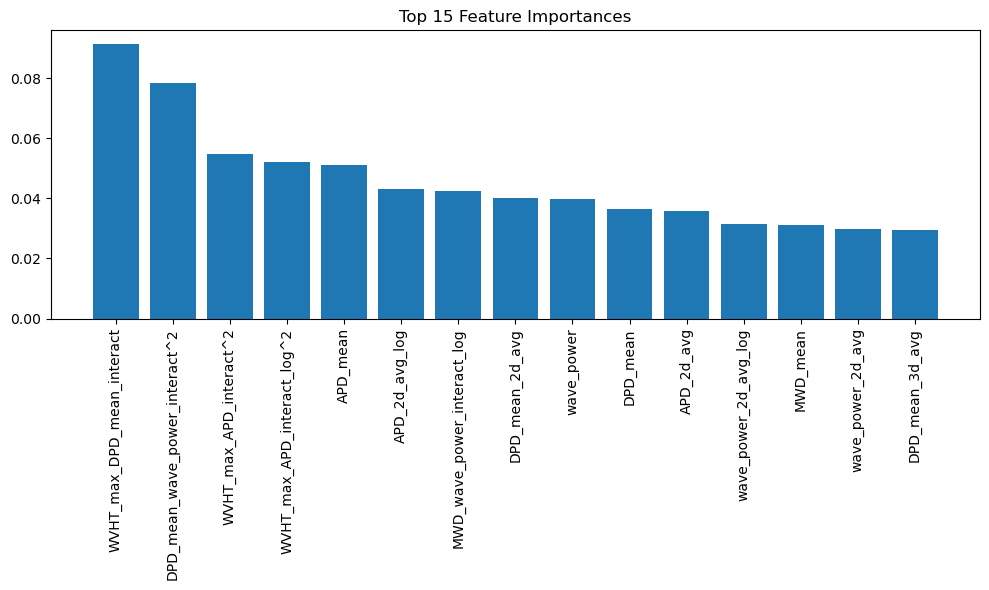

In [9]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'][:15], feature_importances['importance'][:15])
plt.xticks(rotation=90)
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

In [10]:
print(feature_importances)

                           feature  importance
18      WVHT_max_DPD_mean_interact    0.091335
24  DPD_mean_wave_power_interact^2    0.078372
25         WVHT_max_APD_interact^2    0.054632
26     WVHT_max_APD_interact_log^2    0.052122
3                         APD_mean    0.050928
20                  APD_2d_avg_log    0.042966
23     MWD_wave_power_interact_log    0.042562
10                 DPD_mean_2d_avg    0.040109
6                       wave_power    0.039801
2                         DPD_mean    0.036309
9                       APD_2d_avg    0.035914
21           wave_power_2d_avg_log    0.031308
5                         MWD_mean    0.031075
11               wave_power_2d_avg    0.029806
15                 DPD_mean_3d_avg    0.029585
17           WVHT_max_MWD_interact    0.028696
14                      APD_3d_avg    0.028680
8                       MWD_2d_avg    0.028440
27                         day_cos    0.028258
16               wave_power_3d_avg    0.027669
13           